In [1]:
from codes.hatespeech.pipelines import ML
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import os
import cv2 as cv

# 1. Etiquetas de las variables

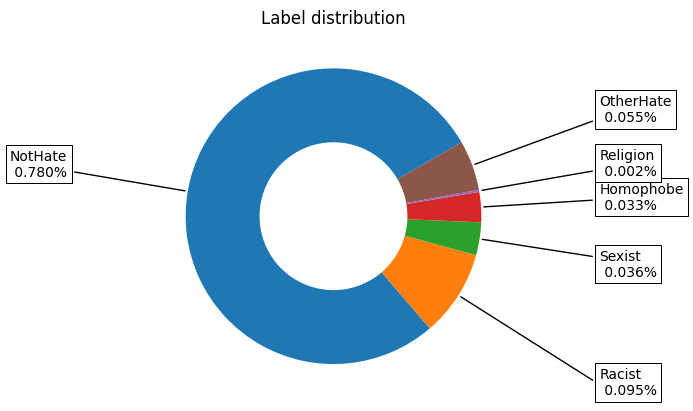

In [3]:
vars = {'0':0,'1':0,'2':0,'3':0,'4':0,'5':0,}
labs = ['NotHate','Racist','Sexist','Homophobe','Religion','OtherHate']

for root, _, files in os.walk('hate-speech/txt'):
    for file in files:
        path = os.path.join(root,file)
        vars[path.split('\\')[-2]] += 1

wedges, texts = plt.pie(vars.values(), wedgeprops=dict(width=0.5), startangle=30)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(f'{labs[i]}\n {list(vars.values())[i]/sum(list(vars.values())):.3f}%', xy=(x, y), xytext=(1.8*np.sign(x), 2.1*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Label distribution')
plt.show()

Hay una mayor abundancia de datos en la categoría 'NotHate' que en las demás. En los demás, la proporción es tan pequeña que puede no ser adecuado realizar una predicción categórica.

Con esta evidencia y bajo el trabajo del paper original del dataset (https://arxiv.org/pdf/1910.03814), se trabajará binariamente: 0 - NotHate, 1 - Hate.

# 2. Información textual

Found 134823 files belonging to 6 classes.
Found 5000 files belonging to 6 classes.
Found 10000 files belonging to 6 classes.


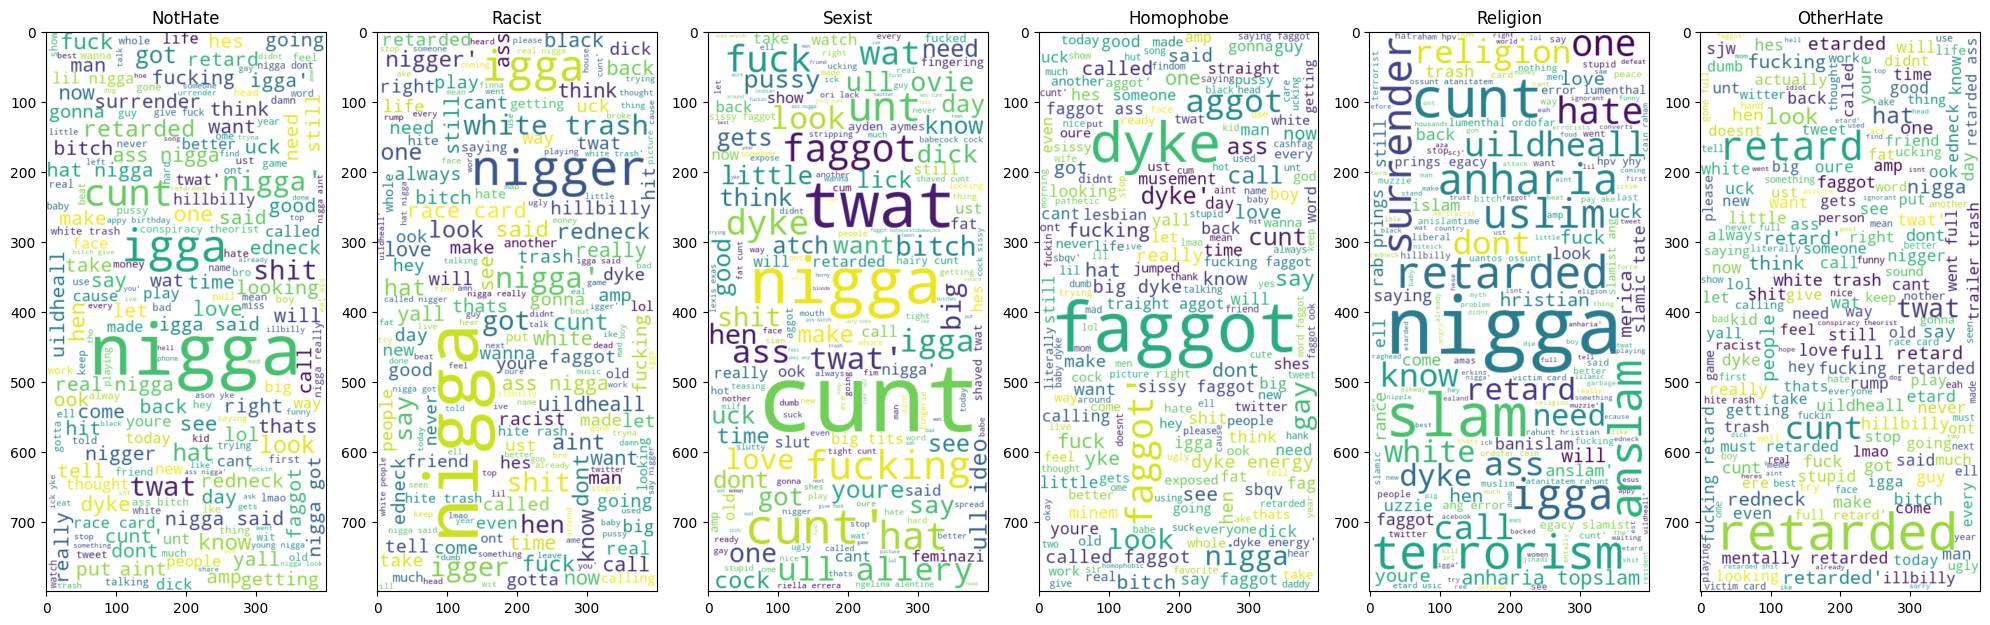

In [5]:
fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(20,40))

TXT = ML('txt')
txts = [[],[],[],[],[],[]]

for x, y in TXT.train.as_numpy_iterator():
    x = re.sub("b'",'',str(x))
    y = int(y)
    txts[y].append(x)

for i in range(6):
    wordcloud = WordCloud(width=400, height=800, background_color='white').generate(' '.join(txts[i]))
    axs[i].imshow(wordcloud,interpolation='bilinear')
    axs[i].set_title(labs[i])
    
plt.tight_layout()
plt.show()

Abundancia de la n-word en las 6 categorías de texto.

# 3. Información gráfica

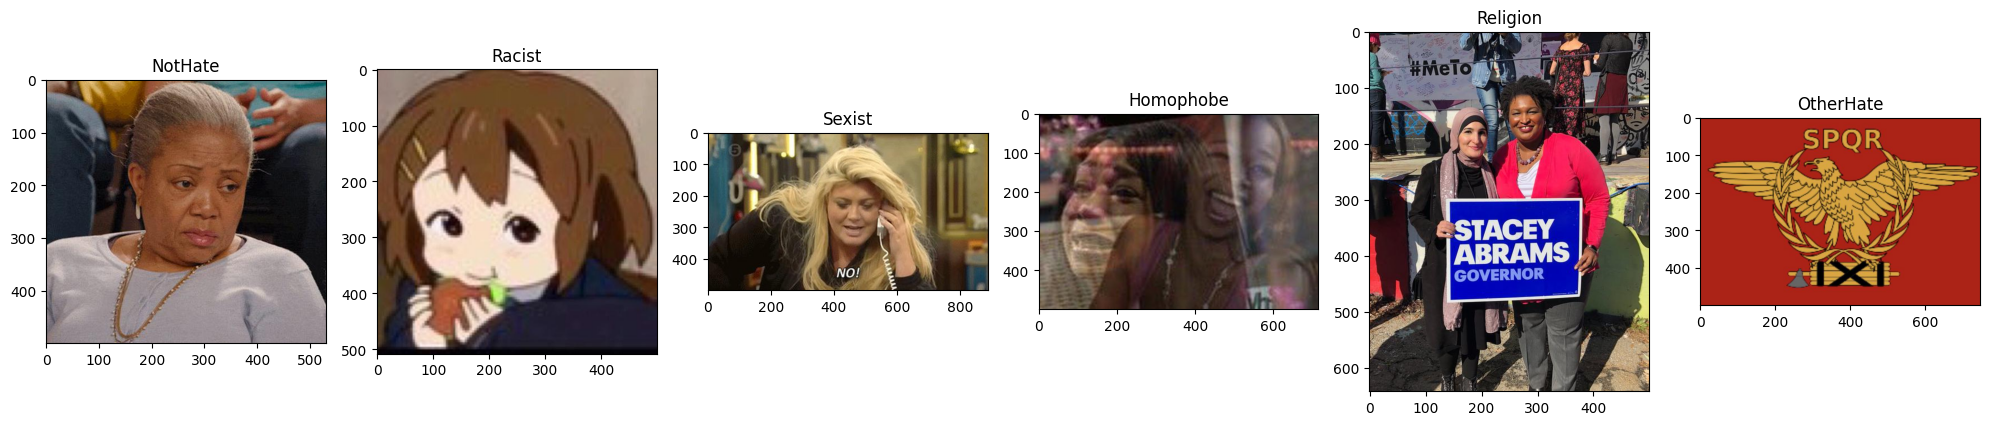

In [26]:
def img_pathing(search_path):
    imgs = []
    for root, _, files in os.walk(search_path):
        for file in files:
            imgs.append(os.path.join(root,file))
    return imgs

fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(20,40))
img_paths = [
    img_pathing(r'hate-speech\img\test\0'),
    img_pathing(r'hate-speech\img\test\1'),
    img_pathing(r'hate-speech\img\test\2'),
    img_pathing(r'hate-speech\img\test\3'),
    img_pathing(r'hate-speech\img\test\4'),
    img_pathing(r'hate-speech\img\test\5'),
]

for i in range(6):
    img = cv.cvtColor(cv.imread(img_paths[i][np.random.randint(0,len(img_paths[i]))]),cv.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].set_title(labs[i])
    
plt.tight_layout()
plt.show()
    

Imágenes con diferentes dimensiones, siendo la mínima dimensión en x o y de 500. Para el entrenamiento, considerar dimensiones cuadradas fijas.

(!!) (Recargar con cuidado. Puede salir pornografía.)